### This tutorial provides you the basics of the Quantum Gates.

A quauntum gate
- acts on qubits i.e. 0 or 1.
- transforms the state of a qubit into other states.

If we denote a quantum gate using $U$, then acting on qubits can be represented as 

$$
U \mid 0 \rangle \\
U \mid 1 \rangle.
$$


After applying $U$ on 0, for example, gives

$$
U \mid 0 \rangle = \frac{\sqrt{2} - i}{2} \mid 0 \rangle - \frac{1}{2} \mid 1 \rangle,
$$

and on 1 gives

$$
U \mid 1 \rangle = \frac{1}{2} \mid 0 \rangle - \frac{\sqrt{2} - i}{2} \mid 1 \rangle .
$$



A valid gate must have following properties:
- linearity i.e. $ U(\alpha \mid 0 \rangle + \beta \mid 1 \rangle = \alpha U \mid 0 \rangle + \beta U \mid 1 \rangle$.
- The total probablity that is the sum of norm of each amplitude must be equal to 1. $ \mid \alpha \mid^2 + \mid \beta \mid^2  = 1$.

We will now list some of the quantum gates that appear in quantum computing frequently.

### Identity gate $I$
This gate turns $\mid 0  \rangle$ into $\mid 0  \rangle$ and $\mid 1  \rangle$ into $\mid 1  \rangle$. Hence, the identity gate does nothing.

$$
    I \mid 0  \rangle = \mid 0  \rangle 
$$
$$
    I \mid 1  \rangle = \mid 1  \rangle
$$

### Pauli X-gate or NOT gate
This gate turns $\mid 0  \rangle$ into $\mid 1  \rangle$ and $\mid 1  \rangle$ into $\mid 0  \rangle$.

$$
    X \mid 0  \rangle = \mid 1  \rangle
$$


$$
    X \mid 1  \rangle = \mid 0  \rangle
$$

### Pauli Y-gate 
This gate turns $\mid 0  \rangle$ into $ i \mid 1  \rangle$ and $\mid 1  \rangle$ into $-i \mid 0  \rangle$. 

$$
    Y \mid 0  \rangle = i \mid 1  \rangle
$$
$$
    Y \mid 1  \rangle = -i \mid 0  \rangle
$$

### Pauli Z-gate
This gate keeps $\mid 0  \rangle$ as $\mid 0  \rangle$ and turns $\mid 1  \rangle$ into $-\mid 1  \rangle$. 

$$
    Z \mid 0  \rangle = \mid 0  \rangle
$$
$$
    Z \mid 1  \rangle = - \mid 1  \rangle
$$

### Phase S-gate
This gate is the square root of the Z-gate.

$$
    S \mid 0  \rangle = \mid 0  \rangle
$$
$$
    S \mid 1  \rangle = i \mid 1  \rangle
$$

### T-gate or $\pi/8$-gate
This gate is the square root of the S-gate.

$$
    T \mid 0  \rangle = \mid 0  \rangle
$$
$$
    T \mid 1  \rangle = \exp^{i \pi/4} \mid 1  \rangle
$$

### Hadamard gate or H-gate 
This gate turns $\mid 0  \rangle$ into $ \mid +  \rangle$ and $\mid 1  \rangle$ into $ \mid -  \rangle$. 

$$
    H \mid 0  \rangle = \frac{1}{\sqrt{2}} ( \mid 0 \rangle + \mid 1  \rangle) = \mid + \rangle
$$
$$
    H \mid 1  \rangle = \frac{1}{\sqrt{2}} ( \mid 0 \rangle - \mid 1  \rangle) = \mid - \rangle
$$

### Quantum circuits

We can draw quantum circuit diagram that consists of qubits and quantum gates. For example, we apply three gates on a single qubit that is in the state $\mid 0 \rangle$ in the following order: H-gate, S-gate, and Z-gate. We can represent this as $ZSH \mid 0 \rangle$. Then, for example, we measure this in Z-basis. We can draw the quantum circuit diagram as follows: 

We import the library

In [1]:
from qiskit import QuantumCircuit


We create a single qubit circuit

In [2]:
qc = QuantumCircuit(1)

We apply H gate on 0

In [3]:
qc.h(0)
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

We apply S gate and then Z gate as follows:

In [4]:
qc.s(0)
qc.z(0)
qc.draw()

┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ Z ├
   └───┘└───┘└───┘

We did not measure the output yet. So, we measure it.

In [5]:
qc.measure_all()

In [6]:
qc.measure

<bound method QuantumCircuit.measure of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fdb0c290250>>

Now, we draw this.

In [7]:
qc.draw()

┌───┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ S ├┤ Z ├─░─┤M├
        └───┘└───┘└───┘ ░ └╥┘
meas: 1/═══════════════════╩═
                           0

But what is the output? 'qc.measure_all()' just adds measurement gates. In order to get the output, we need the following routines:
- We need a simulator
- This simulator will run the designed circuit to generate the output
- We measure output probabilities in the Z-basis
- We visualize the probabilities with a histogram

In [8]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

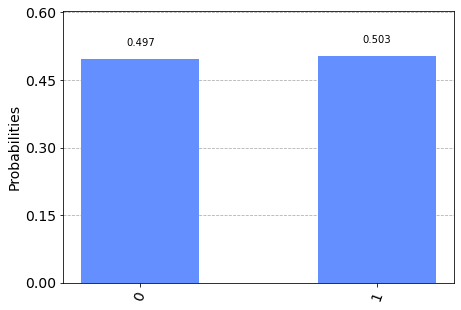

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### Exercise

- Generate the the circuit diagram for $HSTH\mid 0 \rangle$.
- Simulate with Aer simulator and measure the output probabilities in Z-basis.
- Can you do it in pen and paper to measure the output probabilities in Z-basis?

Food for thoughts measure() vs measure_all()

### References
 - https://qiskit.org/textbook/ch-states/single-qubit-gates.html
 - Introudction to classical and quantum computing by Wong